In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as stm

In [10]:
data = pd.read_csv('monthly_champagne_sales.csv')

In [11]:
data.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


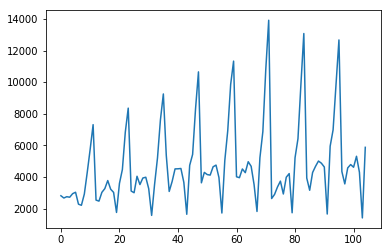

In [12]:
data.Sales.plot()

In [41]:
X.shape

(105,)

In [14]:
X = data.Sales.values

In [39]:
train, test = X[:96] , X[96:]

In [17]:
from sklearn.metrics import mean_squared_error

def evaluate(test, predictions):
    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    print('RMSE: %.3f' % rmse)

In [42]:
history = [x for x in train]
predictions = list()

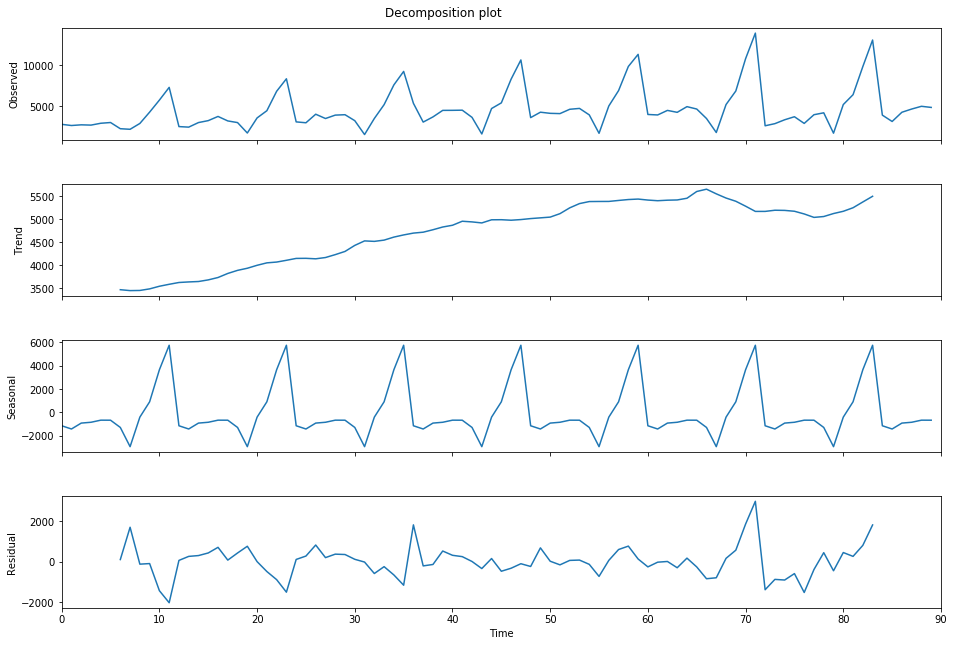

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(train, model='additive', freq = 12)
fig = decomposition.plot()
fig.set_size_inches(15,10)
fig.suptitle('Decomposition plot')
plt.show()

In [43]:
history = [x for x in train]
predictions = list()

In [44]:
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

>Predicted=12670.000, Expected=4348
>Predicted=4348.000, Expected=3564
>Predicted=3564.000, Expected=4577
>Predicted=4577.000, Expected=4788
>Predicted=4788.000, Expected=4618
>Predicted=4618.000, Expected=5312
>Predicted=5312.000, Expected=4298
>Predicted=4298.000, Expected=1413
>Predicted=1413.000, Expected=5877


In [45]:
evaluate(test, predictions)

RMSE: 3345.483


In [48]:
from statsmodels.tsa.arima_model import ARIMA

history = [x for x in train]
predictions = list()

for i in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

C:\Users\mxcsy\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


>Predicted=109.698, Expected=4348
>Predicted=109.698, Expected=3564
>Predicted=109.698, Expected=4577
>Predicted=109.698, Expected=4788
>Predicted=109.698, Expected=4618
>Predicted=109.698, Expected=5312
>Predicted=109.698, Expected=4298
>Predicted=109.698, Expected=1413
>Predicted=109.698, Expected=5877


In [49]:
evaluate(test, predictions)

RMSE: 4366.917


In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

history = [x for x in train]
predictions = list()

for i in range(len(test)):
    model =SARIMAX(history, trend='n', order=(0,1,1), seasonal_order=(0,1,1,12))
    model_fit = model.fit(trend = 'nc',disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

C:\Users\mxcsy\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


>Predicted=4001.139, Expected=4348
>Predicted=3427.021, Expected=3564
>Predicted=4467.028, Expected=4577
>Predicted=4854.328, Expected=4788
>Predicted=5035.885, Expected=4618
>Predicted=5000.983, Expected=5312
>Predicted=4838.111, Expected=4298
>Predicted=1901.760, Expected=1413
>Predicted=6003.223, Expected=5877


In [51]:
evaluate(test, predictions)

RMSE: 328.881
